# Group Project Proposal: 
# Evaluation on the prediction for Algerian Forest Fire based on Temperature and Relative Humidity
Group members: Cassie Zhong, Khoi Nguyen, Helen He, Donna Li

### Introduction

Background information: Using the dataset on Algerian Forest Fires, the occurrence of forest fires can be predicted based on the variables such as temperature and relative humidity. This dataset includes 244 total observation instances from two regions in Algeria, Bejaia and Sidi Bel-abbes, recorded between June 2012 to September 2012. We will be evaluating the accuracy of such predictions.

Question: How accurate is the prediction of whether there is going to be fire or no fire based on temperature and relative humidity?

In [3]:
###
#   Run this cell before continuing.
###

library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(tidyr)
options(repr.matrix.max.rows = 6)
set.seed(9999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### Preliminary exploratory data analysis:

Step 1: Reading the dataset into R

Step 2: Choose the predictors & Dataset Cleaning/Wrangling

Step 3: Summarize data from training dataset

Step 4: Visualize data from training dataset

In [52]:
###
#   Step 1: Reading the dataset into R
###
dataset_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"

# Read dataset of Bajaia region and change Classes column type to fct
bajaia_data_all <- read_csv(dataset_url, skip = 1, n_max = 122) %>%
    mutate(Classes = as.factor(Classes))

# Read first 43 rows of dataset of Sidi-Bel Abbes region and change Classes column type to fct
sidi_data_1 <- read_csv(dataset_url, skip = 126, n_max = 43) %>%
    mutate(Classes = as.factor(Classes))

# Read remaining rows of dataset of Sidi-Bel Abbes region and change Classes column type to fct
sidi_data_2_colnames <- colnames(sidi_data_1)
sidi_data_2 <- read_csv(dataset_url, skip = 171, col_names = sidi_data_2_colnames) %>%
    mutate(Classes = as.factor(Classes))

# Concatenate the Sidi-Bel Abbes data frames
sidi_data_all <- rbind(sidi_data_1, sidi_data_2)

# Display raw datasets
bajaia_data_all %>%
    head(6)
# sidi_data_1
# sidi_data_2
sidi_data_all %>%
    head(6)

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_double(),
  Classes = col_character()
)

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_double(),
  Classes = col_character()
)

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
06,06,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
02,06,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
03,06,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
04,06,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
05,06,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


### Reasoning for Step 1

Because in the oroginal dataset the 171th row is messed up, so we decided to skip this row (which is in the Sidi-Bel dataset). What we did in the above code cell is to read the entire Bajaia dataset (not affected by 171th row), split the Sidi-Bel dataset at 171th row, and recombine the two parts of the splitted Sidi-Bel dataset

In [53]:
###
#   Step 2: Dataset Cleaning & Wrangling
###

# Bind new Region column to each data frame
bajaia_region <- "Bajaia"
sidi_region <- "Sidi-Bel Abbes"
bajaia_data_all["Region"] <- bajaia_region
sidi_data_all["Region"] <- sidi_region

# Select Temperature, RH, Classes and Region columns
bajaia_selected <- bajaia_data_all %>%
    select(Region, Ws, RH, Classes)
sidi_selected <- sidi_data_all %>%
    select(Region, Ws, RH, Classes)

# Combine Bajaia and Sidi-Bel Abbes data frames
fire_data <- rbind(bajaia_selected, sidi_selected)

# Split data into training and testing sets
fire_split <- initial_split(fire_data, prop = 0.75, strata = Classes)
fire_train <- training(fire_split)
fire_test <- testing(fire_split)

# Display datasets
# bajaia_data_all
# sidi_data_all
# bajaia_selected
# sidi_selected
fire_data
fire_train
fire_test

Region,Ws,RH,Classes
<chr>,<dbl>,<dbl>,<fct>
Bajaia,18,57,not fire
Bajaia,13,61,not fire
Bajaia,22,82,not fire
⋮,⋮,⋮,⋮
Sidi-Bel Abbes,29,87,not fire
Sidi-Bel Abbes,18,54,not fire
Sidi-Bel Abbes,15,64,not fire


Region,Temperature,RH,Classes
<chr>,<dbl>,<dbl>,<fct>
Bajaia,29,57,not fire
Bajaia,26,82,not fire
Bajaia,25,89,not fire
⋮,⋮,⋮,⋮
Sidi-Bel Abbes,28,87,not fire
Sidi-Bel Abbes,27,87,not fire
Sidi-Bel Abbes,24,64,not fire


Region,Temperature,RH,Classes
<chr>,<dbl>,<dbl>,<fct>
Bajaia,29,61,not fire
Bajaia,31,67,fire
Bajaia,25,88,not fire
⋮,⋮,⋮,⋮
Sidi-Bel Abbes,34,44,fire
Sidi-Bel Abbes,26,49,not fire
Sidi-Bel Abbes,24,54,not fire


In [64]:
###
#   Step 3: Summarize data from training dataset
###

# Get number of observations for each Classes in total dataset
fire_yes <- fire_data %>%
    filter(Classes == "fire") %>%
    nrow()
fire_no <- fire_data %>%
    filter(Classes == "not fire") %>%
    nrow()
# fire_yes
# fire_no

# Get number of observations for each Classes in training dataset
fire_train_yes <- fire_train %>%
    filter(Classes == "fire") %>%
    nrow()
fire_train_no <- fire_train %>%
    filter(Classes == "not fire") %>%
    nrow()
observations_per_class <- tibble(classes = c("fire", "not fire"), 
                                 observations = c(fire_train_yes, fire_train_no))
observations_per_class

classes,observations
<chr>,<int>
fire,103
not fire,80


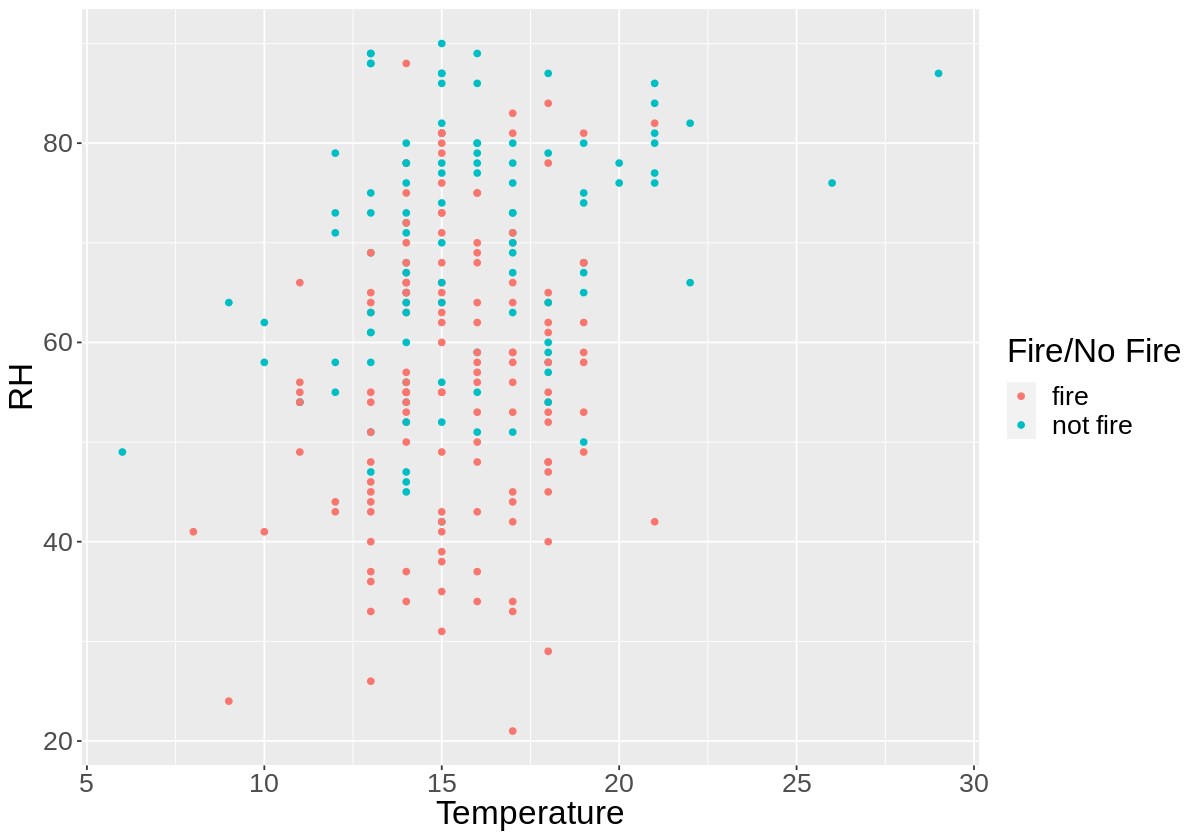

In [37]:
###
#   Step 4: Visualize data from training dataset
###
options(repr.plot.height = 7, repr.plot.width = 10)
temp_rh_plot <- ggplot (fire_data, aes(x = Ws, y = RH, color = Classes)) +
                    geom_point() +
                    labs(x = "Temperature", y = "RH", color = "Fire/No Fire") +
                    theme(text = element_text(size = 20))
temp_rh_plot #A plot showing how the variables are related

# To-do List:
Use pivot_longer to separate the regions? # Done

Split the dataset into training and testing

Use the training set to make a summary table of the data (e.g. calculate mean temperature & mean RH by group)

Propse a classification model that we are going to use?

### Methods

Summarizing data: The variables that will be used are temperature and relative humidity, so we will select these two columns and the class column. We calculate the means of these two predictors for both groups of data (fire / no fire) and compare to see that these two variables are good predictors for the outcome.

Visualizing data: We visualize the results in a scatter plot to depict the occurrences of forest fires. We put temperature on x-axis and relative humidity on y axis, and color whether there is fire or no fire. Based on this plot, we will make our rough prediction for the new observation. Then we will perform a classification analysis using the knn model. We will evaluate the accuracy and choose the best k.




### Expected outcomes and significance

The outcome will be expected as a classification of either “fire” or “no fire” based on the new observation. This outcome will be significant because the local government can take necessary measures to minimize loss if there is going to be a fire by warning the residents in advance. This will lead to some future questions such as how to minimize the spread if there is a fire, and how to prevent a fire by manually adjusting temperature or humidity.
